# Task 36: Implementation of CNN:

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Importing Dataset:

The dataset we are going to use is **fashion_mnist** take it from the keras's dataset.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Each row corresponds to a fashion item. <br>
What is the size of the inputs? It is 28 into 28 pixels. <br>
Class names are not there in the dataset which you need to assign manually.

### Asigning Classnames:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Standardization:

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Standardization** is done so the all inputs are treated equally. <br>
This is Mean_Max_Scaler, so as you know this is an image and a grayscale image so the value of each of the pixel is going to be between 0 to 255.

### Validation Set:

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

### Look at few Input Images:

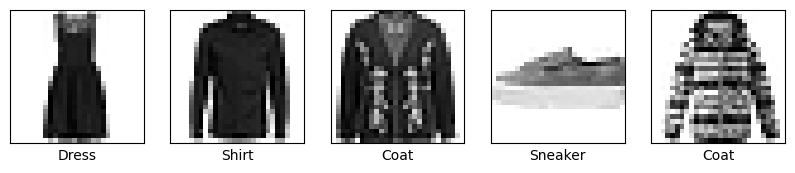

In [7]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Fixing the CNN Image Size:

In [8]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1)

In [9]:
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_val = X_val.reshape(X_val.shape[0],*image_shape)

In [10]:
X_train.shape

(48000, 28, 28, 1)

You can see that there are 48,000 images which of 28 by 28 dimension and '1' because the no. of channels is one (which is grayscale).

In [11]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = image_shape))
cnn_model.add(MaxPool2D(pool_size=2)) # down sampling the output instead of 28x28 it is 14x14
cnn_model.add(Flatten()) # flatten out the layers
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [14]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=15,
    verbose=1,
    validation_data=(X_val, y_val))

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.3439 - loss: 1.9134 - val_accuracy: 0.6647 - val_loss: 1.0369
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6984 - loss: 0.9188 - val_accuracy: 0.7697 - val_loss: 0.6875
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7734 - loss: 0.6526 - val_accuracy: 0.8045 - val_loss: 0.5688
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8020 - loss: 0.5584 - val_accuracy: 0.8293 - val_loss: 0.5084
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8219 - loss: 0.5059 - val_accuracy: 0.8429 - val_loss: 0.4728
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8354 - loss: 0.4736 - val_accuracy: 0.8455 - val_loss: 0.4522
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8429 - loss: 0.4542 - val_accuracy: 0.8535 - val_loss: 0.4287
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8463 - loss: 0.4344 - val_accuracy: 0.8587 - val_loss:

### Plotting the Accuracy and Loss:

Text(0.5, 1.0, 'Train - Accuracy')

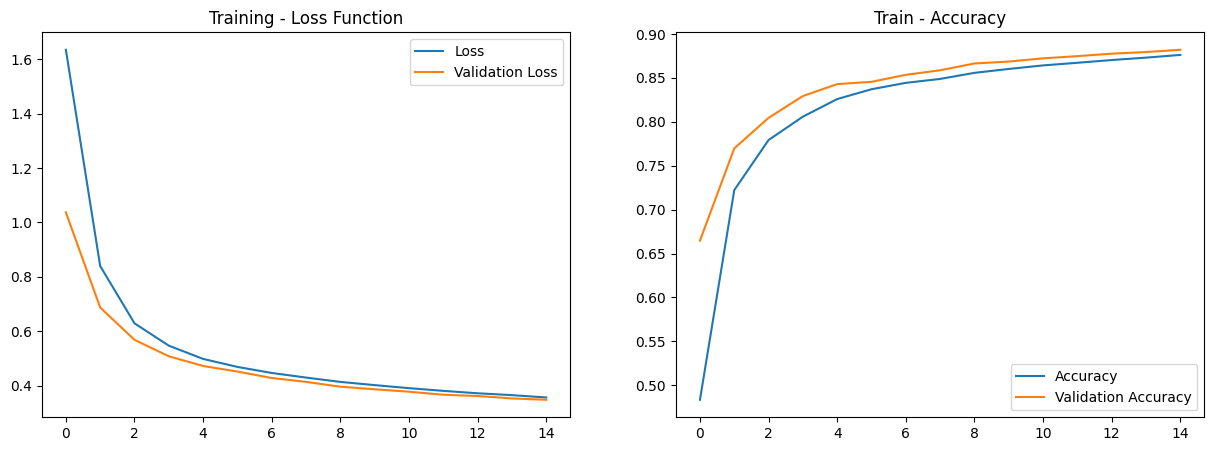

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

You can see that,
* In **Training - Loss Function**, epoch to epoch there is a drop on the loss.
* In **Train - Accuracy**, epoch to epoch there is a rise on its accuracy.

### Predicting on the Test set:

Now, let's just apply it on our testing set and see how we are doing on our testing set.

In [18]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)  # get the class with highest probability

correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]

from sklearn.metrics import classification_report
# target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names = class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.85      0.83      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.81      0.77      0.79      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.78      0.79      0.79      1000
      Sandal       0.94      0.95      0.95      1000
       Shirt       0.66      0.63      0.64      1000
     Sneaker       0.92      0.92      0.92      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

